In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression  

In [44]:
#Upload homeprice excel file

os.chdir("/Users/rickykuehn/Desktop/UCLA/Intensive/Assignment 6/")
homeprice = pd.read_excel('W02b_homeprice.xlsx')

In [45]:
homeprice.head()

,MSA (Metropolitan Statistical Area),homepriceg,bpo_pop03,pincomeg,chci,jante,ocean,unaval,pop03
0,"New York-Northern New Jersey-Long Island, NY-N...",121.7,4.5,101.7,132.4,32.0,1,40.4,18598803
1,"Los Angeles-Long Beach-Santa Ana, CA (Metropol...",121.5,3.2,98.9,126.6,57.3,1,52.5,12696521
2,"Chicago-Joliet-Naperville, IL-IN-WI (Metropoli...",47.6,6.6,83.3,132.3,22.0,0,40.0,9233303
3,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...",92.8,4.9,99.7,133.4,32.0,1,10.2,5773864
4,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",61.6,13.9,153.0,129.3,44.0,0,9.2,5529247


In [46]:
#correlation chart
corr1 = homeprice.corr()
corr1

,homepriceg,bpo_pop03,pincomeg,chci,jante,ocean,unaval,pop03
homepriceg,1.000000,-0.169263,0.221915,0.345146,0.000297,0.429371,0.379212,0.246449
bpo_pop03,-0.169263,1.000000,0.622337,0.108032,0.304514,0.138244,0.085852,-0.039654
pincomeg,0.221915,0.622337,1.000000,0.029674,0.371005,0.152750,0.016972,0.044817
chci,0.345146,0.108032,0.029674,1.000000,-0.386540,0.157209,0.076813,0.108757
jante,0.000297,0.304514,0.371005,-0.386540,1.000000,0.341931,0.320524,0.114709
ocean,0.429371,0.138244,0.152750,0.157209,0.341931,1.000000,0.565540,0.312211
unaval,0.379212,0.085852,0.016972,0.076813,0.320524,0.565540,1.000000,0.107429
pop03,0.246449,-0.039654,0.044817,0.108757,0.114709,0.312211,0.107429,1.000000


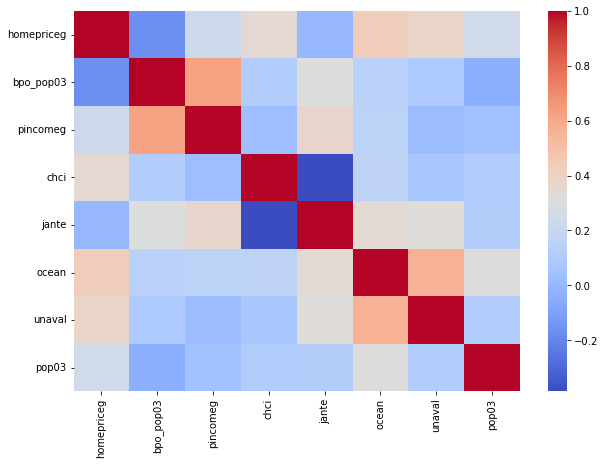

In [47]:
#plot correlation
plt.figure(figsize=(10,7))
sns.heatmap(corr1, cmap='coolwarm')
plt.show()

In [48]:
#replicate figure 1
top30_metro = homeprice.loc[homeprice['pop03'] > 1690000]
print(top30_metro)

                  MSA (Metropolitan Statistical Area)  homepriceg  bpo_pop03  \
0   New York-Northern New Jersey-Long Island, NY-N...       121.7        4.5   
1   Los Angeles-Long Beach-Santa Ana, CA (Metropol...       121.5        3.2   
2   Chicago-Joliet-Naperville, IL-IN-WI (Metropoli...        47.6        6.6   
3   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...        92.8        4.9   
4   Dallas-Fort Worth-Arlington, TX (Metropolitan ...        61.6       13.9   
5   Miami-Fort Lauderdale-Pompano Beach, FL (Metro...        86.5        7.6   
6   Washington-Arlington-Alexandria, DC-VA-MD-WV (...       116.8       10.4   
7   Houston-Sugar Land-Baytown, TX (Metropolitan S...        87.1       14.2   
8   Atlanta-Sandy Springs-Marietta, GA (Metropolit...        35.3       18.5   
9   Detroit-Warren-Livonia, MI (Metropolitan Stati...        16.0        6.2   
10  Boston-Cambridge-Quincy, MA-NH (Metropolitan S...       124.4        3.6   
11  San Francisco-Oakland-Fremont, CA (M

In [49]:
#new df with MSA and homepriceg
top30_hpg = top30_metro[["MSA (Metropolitan Statistical Area)", "homepriceg"]]
print(top30_hpg)

                  MSA (Metropolitan Statistical Area)  homepriceg
0   New York-Northern New Jersey-Long Island, NY-N...       121.7
1   Los Angeles-Long Beach-Santa Ana, CA (Metropol...       121.5
2   Chicago-Joliet-Naperville, IL-IN-WI (Metropoli...        47.6
3   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...        92.8
4   Dallas-Fort Worth-Arlington, TX (Metropolitan ...        61.6
5   Miami-Fort Lauderdale-Pompano Beach, FL (Metro...        86.5
6   Washington-Arlington-Alexandria, DC-VA-MD-WV (...       116.8
7   Houston-Sugar Land-Baytown, TX (Metropolitan S...        87.1
8   Atlanta-Sandy Springs-Marietta, GA (Metropolit...        35.3
9   Detroit-Warren-Livonia, MI (Metropolitan Stati...        16.0
10  Boston-Cambridge-Quincy, MA-NH (Metropolitan S...       124.4
11  San Francisco-Oakland-Fremont, CA (Metropolita...       141.5
12  Riverside-San Bernardino-Ontario, CA (Metropol...        67.6
13  Phoenix-Mesa-Glendale, AZ (Metropolitan Statis...        60.2
14  Seattl

In [50]:
#rename
top30_hpg.columns = ['MSA', 'hpg']
top30_hpg['MSA'] = top30_hpg['MSA'].str.replace('(Metropolitan Statistical Area)','')
top30_hpg['MSA'] = top30_hpg['MSA'].str.replace(' ()','')
print(top30_hpg)

                                                MSA    hpg
0   NewYork-NorthernNewJersey-LongIsland,NY-NJ-PA()  121.7
1                LosAngeles-LongBeach-SantaAna,CA()  121.5
2              Chicago-Joliet-Naperville,IL-IN-WI()   47.6
3      Philadelphia-Camden-Wilmington,PA-NJ-DE-MD()   92.8
4                   Dallas-FortWorth-Arlington,TX()   61.6
5            Miami-FortLauderdale-PompanoBeach,FL()   86.5
6     Washington-Arlington-Alexandria,DC-VA-MD-WV()  116.8
7                    Houston-SugarLand-Baytown,TX()   87.1
8                Atlanta-SandySprings-Marietta,GA()   35.3
9                       Detroit-Warren-Livonia,MI()   16.0
10                  Boston-Cambridge-Quincy,MA-NH()  124.4
11                SanFrancisco-Oakland-Fremont,CA()  141.5
12             Riverside-SanBernardino-Ontario,CA()   67.6
13                       Phoenix-Mesa-Glendale,AZ()   60.2
14                     Seattle-Tacoma-Bellevue,WA()   98.4
15          Minneapolis-St.Paul-Bloomington,MN-WI()   74

/var/folders/35/6shxnbqj7097brzwcyns9h4w0000gn/T/ipykernel_35708/3283081892.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  top30_hpg['MSA'] = top30_hpg['MSA'].str.replace('(Metropolitan Statistical Area)','')
/var/folders/35/6shxnbqj7097brzwcyns9h4w0000gn/T/ipykernel_35708/3283081892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30_hpg['MSA'] = top30_hpg['MSA'].str.replace('(Metropolitan Statistical Area)','')
/var/folders/35/6shxnbqj7097brzwcyns9h4w0000gn/T/ipykernel_35708/3283081892.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  top30_hpg['MSA'] = top30_hpg['MSA'].str.replace(' ()','')
/var/folders/35/6shxnbqj7097brzwcyns9h4w00

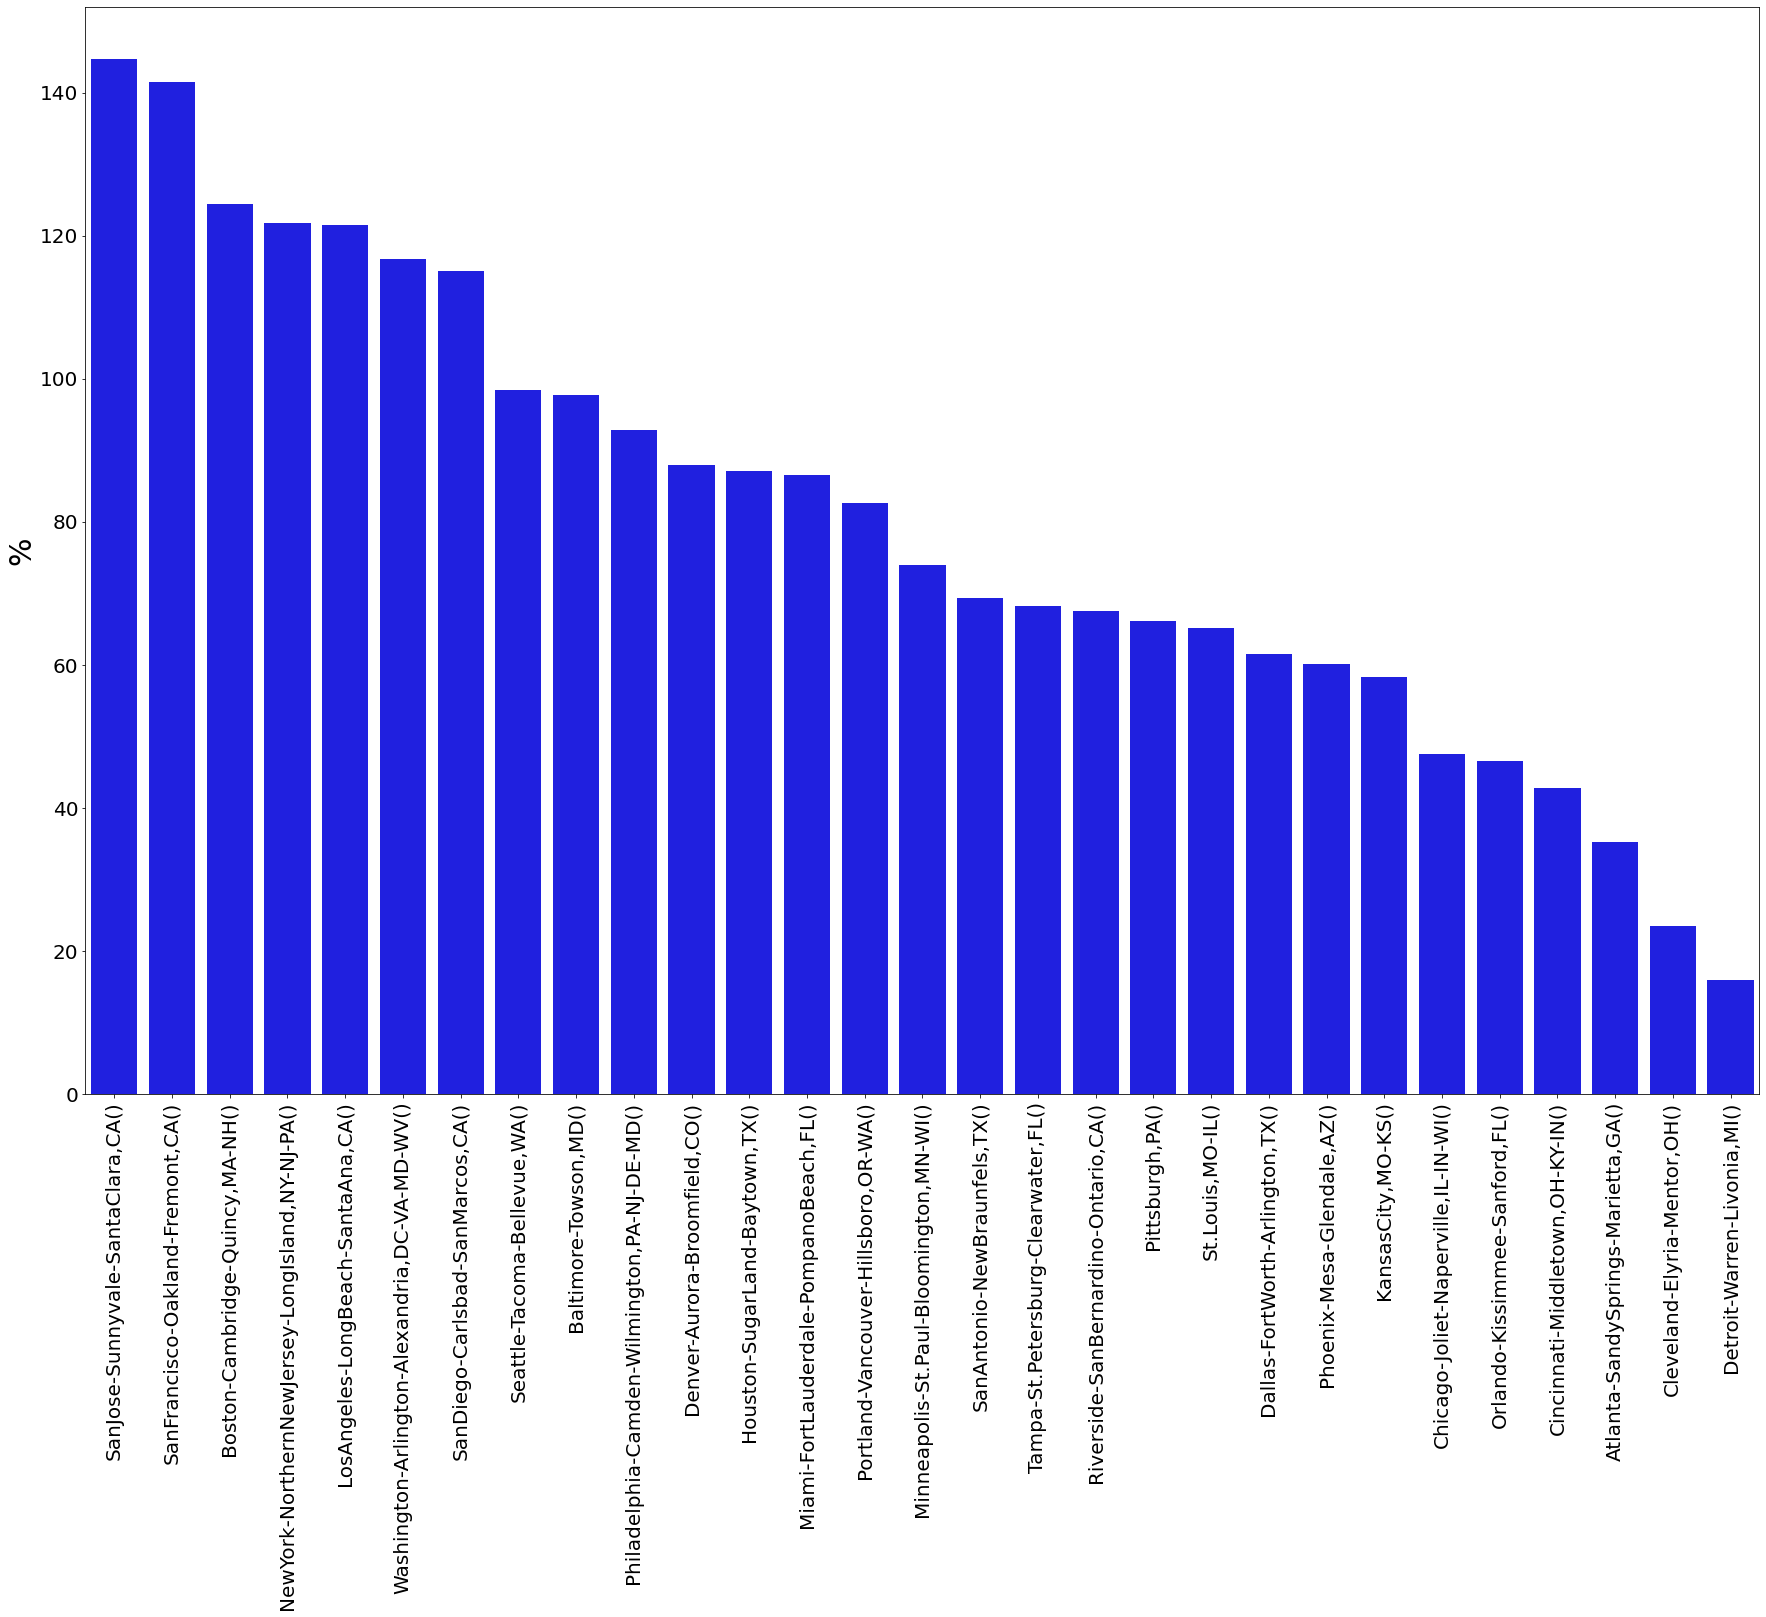

In [51]:
#plot bar chart
plt.figure(figsize=(30,20))
sns.barplot(x="MSA", y="hpg", data=top30_hpg, color="b", order=top30_hpg.sort_values("hpg", ascending=False).MSA)
plt.xlabel("")
plt.ylabel("%", size=30)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.show()

In [54]:
#replicate figure 5
hpg_unaval = homeprice[["homepriceg", "unaval"]]
print(hpg_unaval)

     homepriceg  unaval
0         121.7    40.4
1         121.5    52.5
2          47.6    40.0
3          92.8    10.2
4          61.6     9.2
..          ...     ...
240       114.6     5.9
241        79.1    34.6
242        67.4    11.2
243        90.6    18.1
244       141.7    13.7

[245 rows x 2 columns]


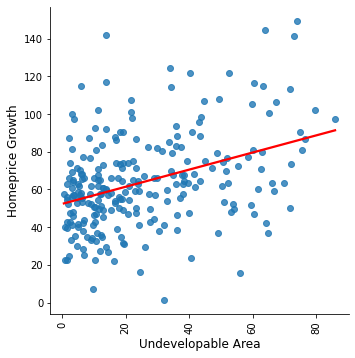

In [59]:
#plot
sns.lmplot(x="unaval", y="homepriceg", data=hpg_unaval, line_kws={'color': 'red'}, ci=None) 
plt.xlabel("Undevelopable Area", size=12)
plt.ylabel("Homeprice Growth", size=12)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [63]:
#replicate table 2
homeprice.columns = ['MSA', 'Home Price Growth', 'Home Supply', 'Economy', 'Human Capital',
                    'Climate', 'Ocean', 'Geography', 'City Size']
homeprice.head

<bound method NDFrame.head of                                                    MSA  Home Price Growth  \
0    New York-Northern New Jersey-Long Island, NY-N...              121.7   
1    Los Angeles-Long Beach-Santa Ana, CA (Metropol...              121.5   
2    Chicago-Joliet-Naperville, IL-IN-WI (Metropoli...               47.6   
3    Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...               92.8   
4    Dallas-Fort Worth-Arlington, TX (Metropolitan ...               61.6   
..                                                 ...                ...   
240       Bismarck, ND (Metropolitan Statistical Area)              114.6   
241         Elmira, NY (Metropolitan Statistical Area)               79.1   
242        Dubuque, IA (Metropolitan Statistical Area)               67.4   
243    Great Falls, MT (Metropolitan Statistical Area)               90.6   
244         Casper, WY (Metropolitan Statistical Area)              141.7   

     Home Supply  Economy  Human Capital  Cli

In [65]:
#linear regression
x = homeprice[['Home Supply', 'Economy', 'Human Capital',
                    'Climate', 'Ocean', 'Geography', 'City Size']]
y = homeprice['Home Price Growth']
X = sm.add_constant(x)
eq01 = sm.OLS(y,X).fit()
print(eq01.summary())

                            OLS Regression Results                            
Dep. Variable:      Home Price Growth   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     41.03
Date:                Wed, 18 May 2022   Prob (F-statistic):           1.51e-37
Time:                        18:49:57   Log-Likelihood:                -1038.5
No. Observations:                 245   AIC:                             2093.
Df Residuals:                     237   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -128.7747     31.740     -4.057

In [71]:
#in-sample predicition
pred01 = eq01.predict(X)
pred01.head()

0    114.087280
1    101.472142
2     77.060263
3     88.712502
4     65.953668
dtype: float64

In [70]:
homeprice.head()

,MSA,Home Price Growth,Home Supply,Economy,Human Capital,Climate,Ocean,Geography,City Size
0,"New York-Northern New Jersey-Long Island, NY-N...",121.7,4.5,101.7,132.4,32.0,1,40.4,18598803
1,"Los Angeles-Long Beach-Santa Ana, CA (Metropol...",121.5,3.2,98.9,126.6,57.3,1,52.5,12696521
2,"Chicago-Joliet-Naperville, IL-IN-WI (Metropoli...",47.6,6.6,83.3,132.3,22.0,0,40.0,9233303
3,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...",92.8,4.9,99.7,133.4,32.0,1,10.2,5773864
4,"Dallas-Fort Worth-Arlington, TX (Metropolitan ...",61.6,13.9,153.0,129.3,44.0,0,9.2,5529247


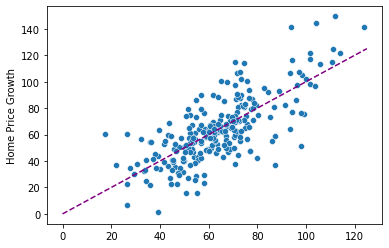

In [72]:
sns.scatterplot(x=pred01, y= y)
plt.plot([0,125],[0,125], color = 'purple', linestyle='--')